In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem.QED import QEDproperties
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [3]:
# Reading and choosing the relevant columns

dfa=pd.read_csv('DHODH_covid_bioactivities.csv',sep=';')
selection=['Molecule_ChEMBL_ID','Smiles','Standard_Value']
dfb=dfa[selection].dropna()
dfb

,Molecule_ChEMBL_ID,Smiles,Standard_Value
0,CHEMBL116206,Cc1cc(Nc2ccc(C(F)(F)F)cc2)[nH]n1,16500.00
1,CHEMBL118125,Cc1n[nH]c(Nc2c(F)cc(F)cc2F)c1C#N,22400.00
2,CHEMBL486489,Cc1nc2ncnn2c(Nc2ccc3ccccc3c2)c1C,200000.00
3,CHEMBL118168,FC(F)(F)c1ccc(Nc2[nH]nc3c2CCCC3)cc1,6200.00
4,CHEMBL2047246,Nc1nc2c(c(Nc3cccc(F)c3)n1)-c1ccccc1C2,200000.00
...,...,...,...
1211,CHEMBL3955618,NCCO.O=C(O)c1[nH]c(=O)[nH]c(=O)c1CCc1cccc2ccccc12,434.00
1212,CHEMBL3959702,NCCO.NCCO.O=C(O)c1[nH]c(=O)[nH]c(=O)c1CCc1ccc2...,5000.00
1213,CHEMBL3960872,NCCO.O=C(NCCCc1c(C(=O)O)[nH]c(=O)[nH]c1=O)c1cc...,625.00
1214,CHEMBL4228712,Cc1c(-c2ccc(-c3cccnc3Cl)cc2)nc2ccc(F)cc2c1C(=O)O,9.71


In [3]:
#classifying of compounds' activities
bioactivity_class=[]
count=0
for i in dfb.Standard_Value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
    
  elif float(i) <= 1000:
    bioactivity_class.append("active")
    
  else:
    bioactivity_class.append("intermediate")
    count+=1
  
bioactivity_class=pd.Series(bioactivity_class,name='class')
dfc=pd.concat([dfb,bioactivity_class],axis=1)
dfc=dfc.dropna(axis=0)
print(count)
dfc

186


,Molecule_ChEMBL_ID,Smiles,Standard_Value,class
0,CHEMBL116206,Cc1cc(Nc2ccc(C(F)(F)F)cc2)[nH]n1,16500.0,inactive
1,CHEMBL118125,Cc1n[nH]c(Nc2c(F)cc(F)cc2F)c1C#N,22400.0,inactive
2,CHEMBL486489,Cc1nc2ncnn2c(Nc2ccc3ccccc3c2)c1C,200000.0,inactive
3,CHEMBL118168,FC(F)(F)c1ccc(Nc2[nH]nc3c2CCCC3)cc1,6200.0,intermediate
4,CHEMBL2047246,Nc1nc2c(c(Nc3cccc(F)c3)n1)-c1ccccc1C2,200000.0,inactive
...,...,...,...,...
1050,CHEMBL3185911,O=C(CCNC(=O)c1ccc(F)cc1)N[C@@H]1CCCc2ccccc21,9500.0,active
1051,CHEMBL3410592,CCOC(=O)c1sc(Nc2ccc(C)c(F)c2)nc1C(C)(C)C,652.0,intermediate
1052,CHEMBL3694252,CCCCCC1CCCc2c1nc1ccccc1c2O,30000.0,active
1053,CHEMBL3914213,COc1cccc2cc(CCc3c(C(=O)O)[nH]c(=O)[nH]c3=O)ccc...,20.6,active


In [4]:
dfc=dfc[['Molecule_ChEMBL_ID','Standard_Value','class','Smiles']]
dfc.to_csv('check1.csv',index=False)

In [10]:
#Calculating lipinski parameters

def lipinski(smiles,verbose=False):
    
    moldata=[]
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
    
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        #desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        desc_RotBonds = Descriptors.NumRotatableBonds(mol)
        desc_PolSurfArea = Descriptors.TPSA(mol)
        row = np.array([desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors,
                        desc_RotBonds,
                        desc_PolSurfArea])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["LogP","NumHDonors","NumHAcceptors","Rotatable bonds","TPSA"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [11]:
data_lipinski=lipinski(dfc.Smiles)
data_lipinski.dropna()

,LogP,NumHDonors,NumHAcceptors,Rotatable bonds,TPSA
0,3.48052,2.0,2.0,2.0,40.71
1,2.75070,2.0,3.0,2.0,64.50
2,3.63794,1.0,5.0,2.0,55.11
3,4.05090,2.0,2.0,2.0,40.71
4,3.51270,2.0,4.0,2.0,63.83
...,...,...,...,...,...
895,3.13940,2.0,2.0,5.0,58.20
896,4.80842,1.0,5.0,4.0,51.22
897,4.94060,1.0,2.0,4.0,33.12
898,0.64580,5.0,6.0,6.0,158.50


In [14]:
data3=pd.concat([dfc,data_lipinski],axis=1)
data3.dropna()

,Molecule_ChEMBL_ID,Standard_Value,class,Smiles,LogP,NumHDonors,NumHAcceptors,Rotatable bonds,TPSA
0,CHEMBL116206,16500.00,inactive,Cc1cc(Nc2ccc(C(F)(F)F)cc2)[nH]n1,3.48052,2.0,2.0,2.0,40.71
1,CHEMBL118125,22400.00,inactive,Cc1n[nH]c(Nc2c(F)cc(F)cc2F)c1C#N,2.75070,2.0,3.0,2.0,64.50
2,CHEMBL486489,200000.00,inactive,Cc1nc2ncnn2c(Nc2ccc3ccccc3c2)c1C,3.63794,1.0,5.0,2.0,55.11
3,CHEMBL118168,6200.00,intermediate,FC(F)(F)c1ccc(Nc2[nH]nc3c2CCCC3)cc1,4.05090,2.0,2.0,2.0,40.71
4,CHEMBL2047246,200000.00,inactive,Nc1nc2c(c(Nc3cccc(F)c3)n1)-c1ccccc1C2,3.51270,2.0,4.0,2.0,63.83
...,...,...,...,...,...,...,...,...,...
895,CHEMBL4290104,10000.00,intermediate,COC(=O)/C(C#N)=C1\SCC(=O)N1c1ccnc(Cl)c1,3.13940,2.0,2.0,5.0,58.20
896,CHEMBL4278764,10000.00,active,COC(=O)/C(C#N)=C1\SCC(=O)N1c1cccc2ccccc12,4.80842,1.0,5.0,4.0,51.22
897,CHEMBL3410583,10000.00,inactive,CCOC(=O)c1sc(Nc2ccc(Cl)c(C(F)(F)F)c2)nc1N,4.94060,1.0,2.0,4.0,33.12
898,CHEMBL3409286,12.59,active,Cc1c(Cc2ccccc2F)c(OC(C)C)nn1-c1ncc(C2CC2)cn1,0.64580,5.0,6.0,6.0,158.50


In [26]:
#Calculating pIC50 values

def pIC50(input):
    pIC50 = []

    for i in input['Standard_Value']:
        if(i>100000000):
            i=100000000
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('Standard_Value', 1)
        
    return x


In [27]:
data4 = pIC50(data3)
data4=data4.dropna()
data4.describe()

,LogP,NumHDonors,NumHAcceptors,Rotatable bonds,TPSA,pIC50
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,4.038645,1.913158,4.071053,4.156579,75.063447,5.769138
std,1.571176,1.205099,1.383206,1.578164,32.845290,1.457120
min,-2.409900,0.000000,1.000000,0.000000,16.960000,3.280337
25%,3.318530,1.000000,3.000000,3.000000,55.400000,4.301030
50%,4.301080,2.000000,4.000000,4.000000,66.400000,5.677781
75%,5.030395,2.000000,5.000000,5.000000,75.630000,6.963954
max,7.755300,8.000000,12.000000,15.000000,278.800000,9.013228


In [28]:
data4=data4[data4['class']!='intermediate']
data4

,Molecule_ChEMBL_ID,class,Smiles,LogP,NumHDonors,NumHAcceptors,Rotatable bonds,TPSA,pIC50
0,CHEMBL116206,inactive,Cc1cc(Nc2ccc(C(F)(F)F)cc2)[nH]n1,3.48052,2.0,2.0,2.0,40.71,4.782516
1,CHEMBL118125,inactive,Cc1n[nH]c(Nc2c(F)cc(F)cc2F)c1C#N,2.75070,2.0,3.0,2.0,64.50,4.649752
2,CHEMBL486489,inactive,Cc1nc2ncnn2c(Nc2ccc3ccccc3c2)c1C,3.63794,1.0,5.0,2.0,55.11,3.698970
4,CHEMBL2047246,inactive,Nc1nc2c(c(Nc3cccc(F)c3)n1)-c1ccccc1C2,3.51270,2.0,4.0,2.0,63.83,3.698970
5,CHEMBL1956285,inactive,Cc1cc(Nc2ccc(S(F)(F)(F)(F)F)cc2)n2nc(C(C)(F)F)...,5.94542,1.0,5.0,4.0,55.11,4.000000
...,...,...,...,...,...,...,...,...,...
893,CHEMBL4278286,active,CCCOC(=O)/C(C#N)=C1\SCC(=O)N1c1ccccc1F,2.99948,2.0,3.0,2.0,73.12,5.000000
894,CHEMBL4288967,active,CCCCOC(=O)/C(C#N)=C1\SCC(=O)N1c1ccccc1F,4.39082,0.0,6.0,6.0,62.06,5.000000
896,CHEMBL4278764,active,COC(=O)/C(C#N)=C1\SCC(=O)N1c1cccc2ccccc12,4.80842,1.0,5.0,4.0,51.22,5.000000
897,CHEMBL3410583,inactive,CCOC(=O)c1sc(Nc2ccc(Cl)c(C(F)(F)F)c2)nc1N,4.94060,1.0,2.0,4.0,33.12,5.000000


Text(0, 0.5, 'Frequency')

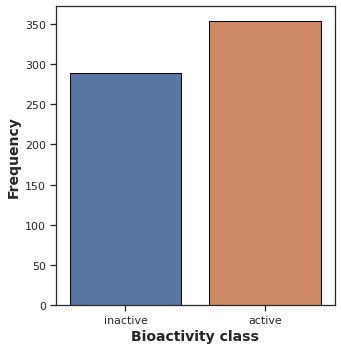

In [29]:
#Exploratory data analysis

sns.set(style='ticks')
plt.figure(figsize=(5,5.5))

sns.countplot(x='class', data=data4, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


Text(0, 0.5, 'pIC50 value')

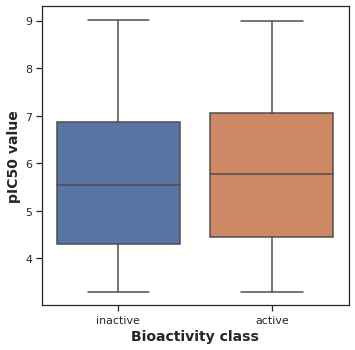

In [46]:
# Box plot for pIC50

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = data4)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')



In [49]:
# Mann-Whitney test function definition :=


def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = data4[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = data4[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
    
    results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
    
  return results



,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,30350.0,3.403514e-19,0.05,Different distribution (reject H0)


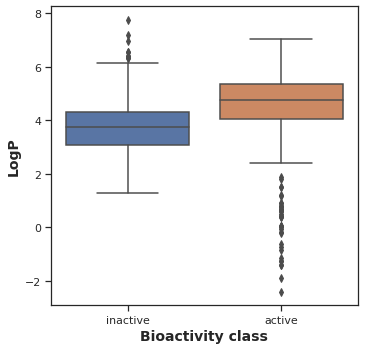

In [53]:
#Box plot for LogP


plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = data4)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,41555.0,0.000013,0.05,Different distribution (reject H0)


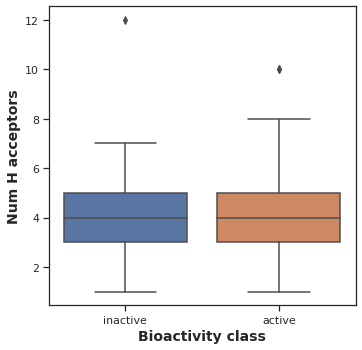

In [54]:
# Box plot for NumHAcceptors

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = data4)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Num H acceptors', fontsize=14, fontweight='bold')

mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,TPSA,24538.0,3.078365e-30,0.05,Different distribution (reject H0)


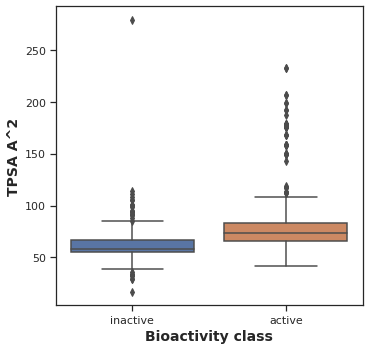

In [55]:
# Box plot for TPSA

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'TPSA', data = data4)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('TPSA A^2', fontsize=14, fontweight='bold')

mannwhitney('TPSA')

,Descriptor,Statistics,p,alpha,Interpretation
0,Rotatable bonds,29009.0,2.919718e-22,0.05,Different distribution (reject H0)


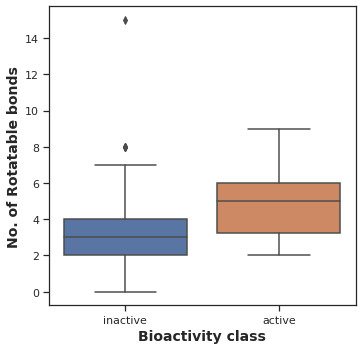

In [56]:
# Box plot for Rotatable bonds

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'Rotatable bonds', data = data4)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('No. of Rotatable bonds', fontsize=14, fontweight='bold')

mannwhitney('Rotatable bonds')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,27089.5,7.798326e-30,0.05,Different distribution (reject H0)


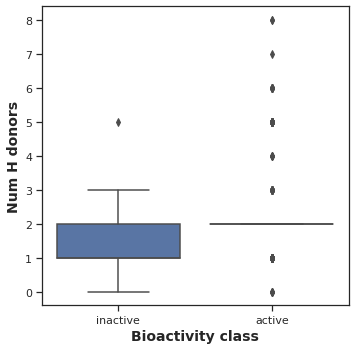

In [57]:
# Box plot for Num H donors

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = data4)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Num H donors', fontsize=14, fontweight='bold')

mannwhitney('NumHDonors')

In [ ]:
'''
A slight modification to Lipinski's rule involves using number of rotatable bonds and 
total polar surface area of the molecule instead of molecular weight as criteria.
We could see that all of the parameters are statistically significantly different.
'''

In [59]:
# Calculating molecular descriptors using Mordred and writing it to a csv file 

selection=['Smiles']
data5=data4[selection]
# Saving this dataframe in a smiles format
data5.to_csv('smile2mol.smi',sep='\t', index=False, header=False)

'''
After using the mordred 'magic' calculator we got the descriptor values in a csv
file. We will start our work from there'''

"\nAfter using the mordred 'magic' calculator we got the descriptor values in a csv\nfile. "

In [60]:
#Saving the pIC50 , smiles and lipinski descriptors dataframe in csv file

data4.to_csv('pIC50+something_dataframe.csv',index=False)

In [7]:
# After calculating all the molecular descriptors from mordred, the descriptor csv needs some cleaning

df=pd.read_csv('mol_descriptors.csv')
df1=df.dropna(axis=1)
df2=df1.dropna(axis=0)


#The descriptors are scaled in this next block of code

threshold = 1000

df3=df2.drop(df2.mean()[df2.mean() > threshold ].index.values, axis=1)
df4=df3.drop(df3.mean()[df3.mean()==0 ].index.values, axis=1)
df5=df4.drop('name',axis=1)
df5.describe()

#scaling the values
df4_scaled=scale(df5)
df4_scaled_pd=pd.DataFrame(df4_scaled)
df4_scaled_pd.to_csv('scaled_mol_descriptors.csv',index=False)